In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('../data/customer_data.csv')

print("="*70)
print("CUSTOMER SEGMENTATION - EXPLORATORY DATA ANALYSIS")
print("="*70)

print(f"\n✅ Total Records: {len(df):,}")
print(f"✅ Total Features: {df.shape[1]}")
print(f"✅ Missing Values: {df.isnull().sum().sum()}")

print("\n" + "="*70)
print("FIRST 10 CUSTOMER RECORDS")
print("="*70)
df.head(10)

CUSTOMER SEGMENTATION - EXPLORATORY DATA ANALYSIS

✅ Total Records: 50,000
✅ Total Features: 11
✅ Missing Values: 0

FIRST 10 CUSTOMER RECORDS


,CustomerID,Age,Annual_Income,Spending_Score,Total_Purchases,Avg_Transaction_Value,Tenure_Months,Website_Visits_Monthly,Email_Open_Rate,Product_Categories,Days_Since_Last_Purchase
0,CUST_000001,47,51487.949699,39.680419,20,93.996763,53,12,0.280864,7,106
1,CUST_000002,37,47474.399439,3.803832,22,57.410068,64,10,0.372186,8,21
2,CUST_000003,49,78896.755003,53.936754,10,108.621199,59,3,0.240420,8,32
3,CUST_000004,62,105494.655380,56.476543,11,101.724135,3,22,0.176416,8,21
4,CUST_000005,36,69107.840691,32.864220,27,89.828575,18,27,0.369591,5,18
5,CUST_000006,36,81289.478839,47.859817,16,229.468303,4,10,0.186263,7,5
6,CUST_000007,63,43971.539930,16.647280,24,71.586479,13,13,0.212912,9,68
7,CUST_000008,51,52192.934122,1.000000,24,97.055976,25,8,0.133359,2,18
8,CUST_000009,32,103039.329775,84.603588,20,123.193202,27,5,0.069271,10,15
9,CUST_000010,48,63790.255983,50.700951,21,64.886140,39,3,0.357779,4,100


In [3]:
print("="*70)
print("STATISTICAL SUMMARY")
print("="*70)
df.describe().round(2)

STATISTICAL SUMMARY


,Age,Annual_Income,Spending_Score,Total_Purchases,Avg_Transaction_Value,Tenure_Months,Website_Visits_Monthly,Email_Open_Rate,Product_Categories,Days_Since_Last_Purchase
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,39.99,55368.61,28.53,20.00,99.88,29.12,11.69,0.29,5.53,59.28
std,13.98,27810.63,23.77,4.49,44.82,27.79,6.24,0.16,2.86,59.10
min,18.00,20000.00,1.00,4.00,10.00,1.00,0.00,0.00,1.00,0.00
25%,29.00,35068.54,9.06,17.00,67.23,8.00,7.00,0.16,3.00,17.00
50%,40.00,49112.06,24.29,20.00,93.14,21.00,11.00,0.27,6.00,41.00
75%,50.00,68763.67,41.96,23.00,125.07,41.00,15.00,0.39,8.00,83.00
max,80.00,150000.00,100.00,41.00,381.16,120.00,50.00,0.92,10.00,365.00


In [4]:
print("="*70)
print("KEY INSIGHTS")
print("="*70)
print(f"• Average Customer Age: {df['Age'].mean():.1f} years")
print(f"• Average Annual Income: ${df['Annual_Income'].mean():,.2f}")
print(f"• Average Spending Score: {df['Spending_Score'].mean():.1f}/100")
print(f"• Average Purchases: {df['Total_Purchases'].mean():.1f}")
print(f"• Average Transaction Value: ${df['Avg_Transaction_Value'].mean():.2f}")
print(f"• Average Customer Tenure: {df['Tenure_Months'].mean():.1f} months")
print(f"• Average Email Open Rate: {df['Email_Open_Rate'].mean():.1%}")
print(f"• Average Website Visits/Month: {df['Website_Visits_Monthly'].mean():.1f}")

KEY INSIGHTS
• Average Customer Age: 40.0 years
• Average Annual Income: $55,368.61
• Average Spending Score: 28.5/100
• Average Purchases: 20.0
• Average Transaction Value: $99.88
• Average Customer Tenure: 29.1 months
• Average Email Open Rate: 28.6%
• Average Website Visits/Month: 11.7


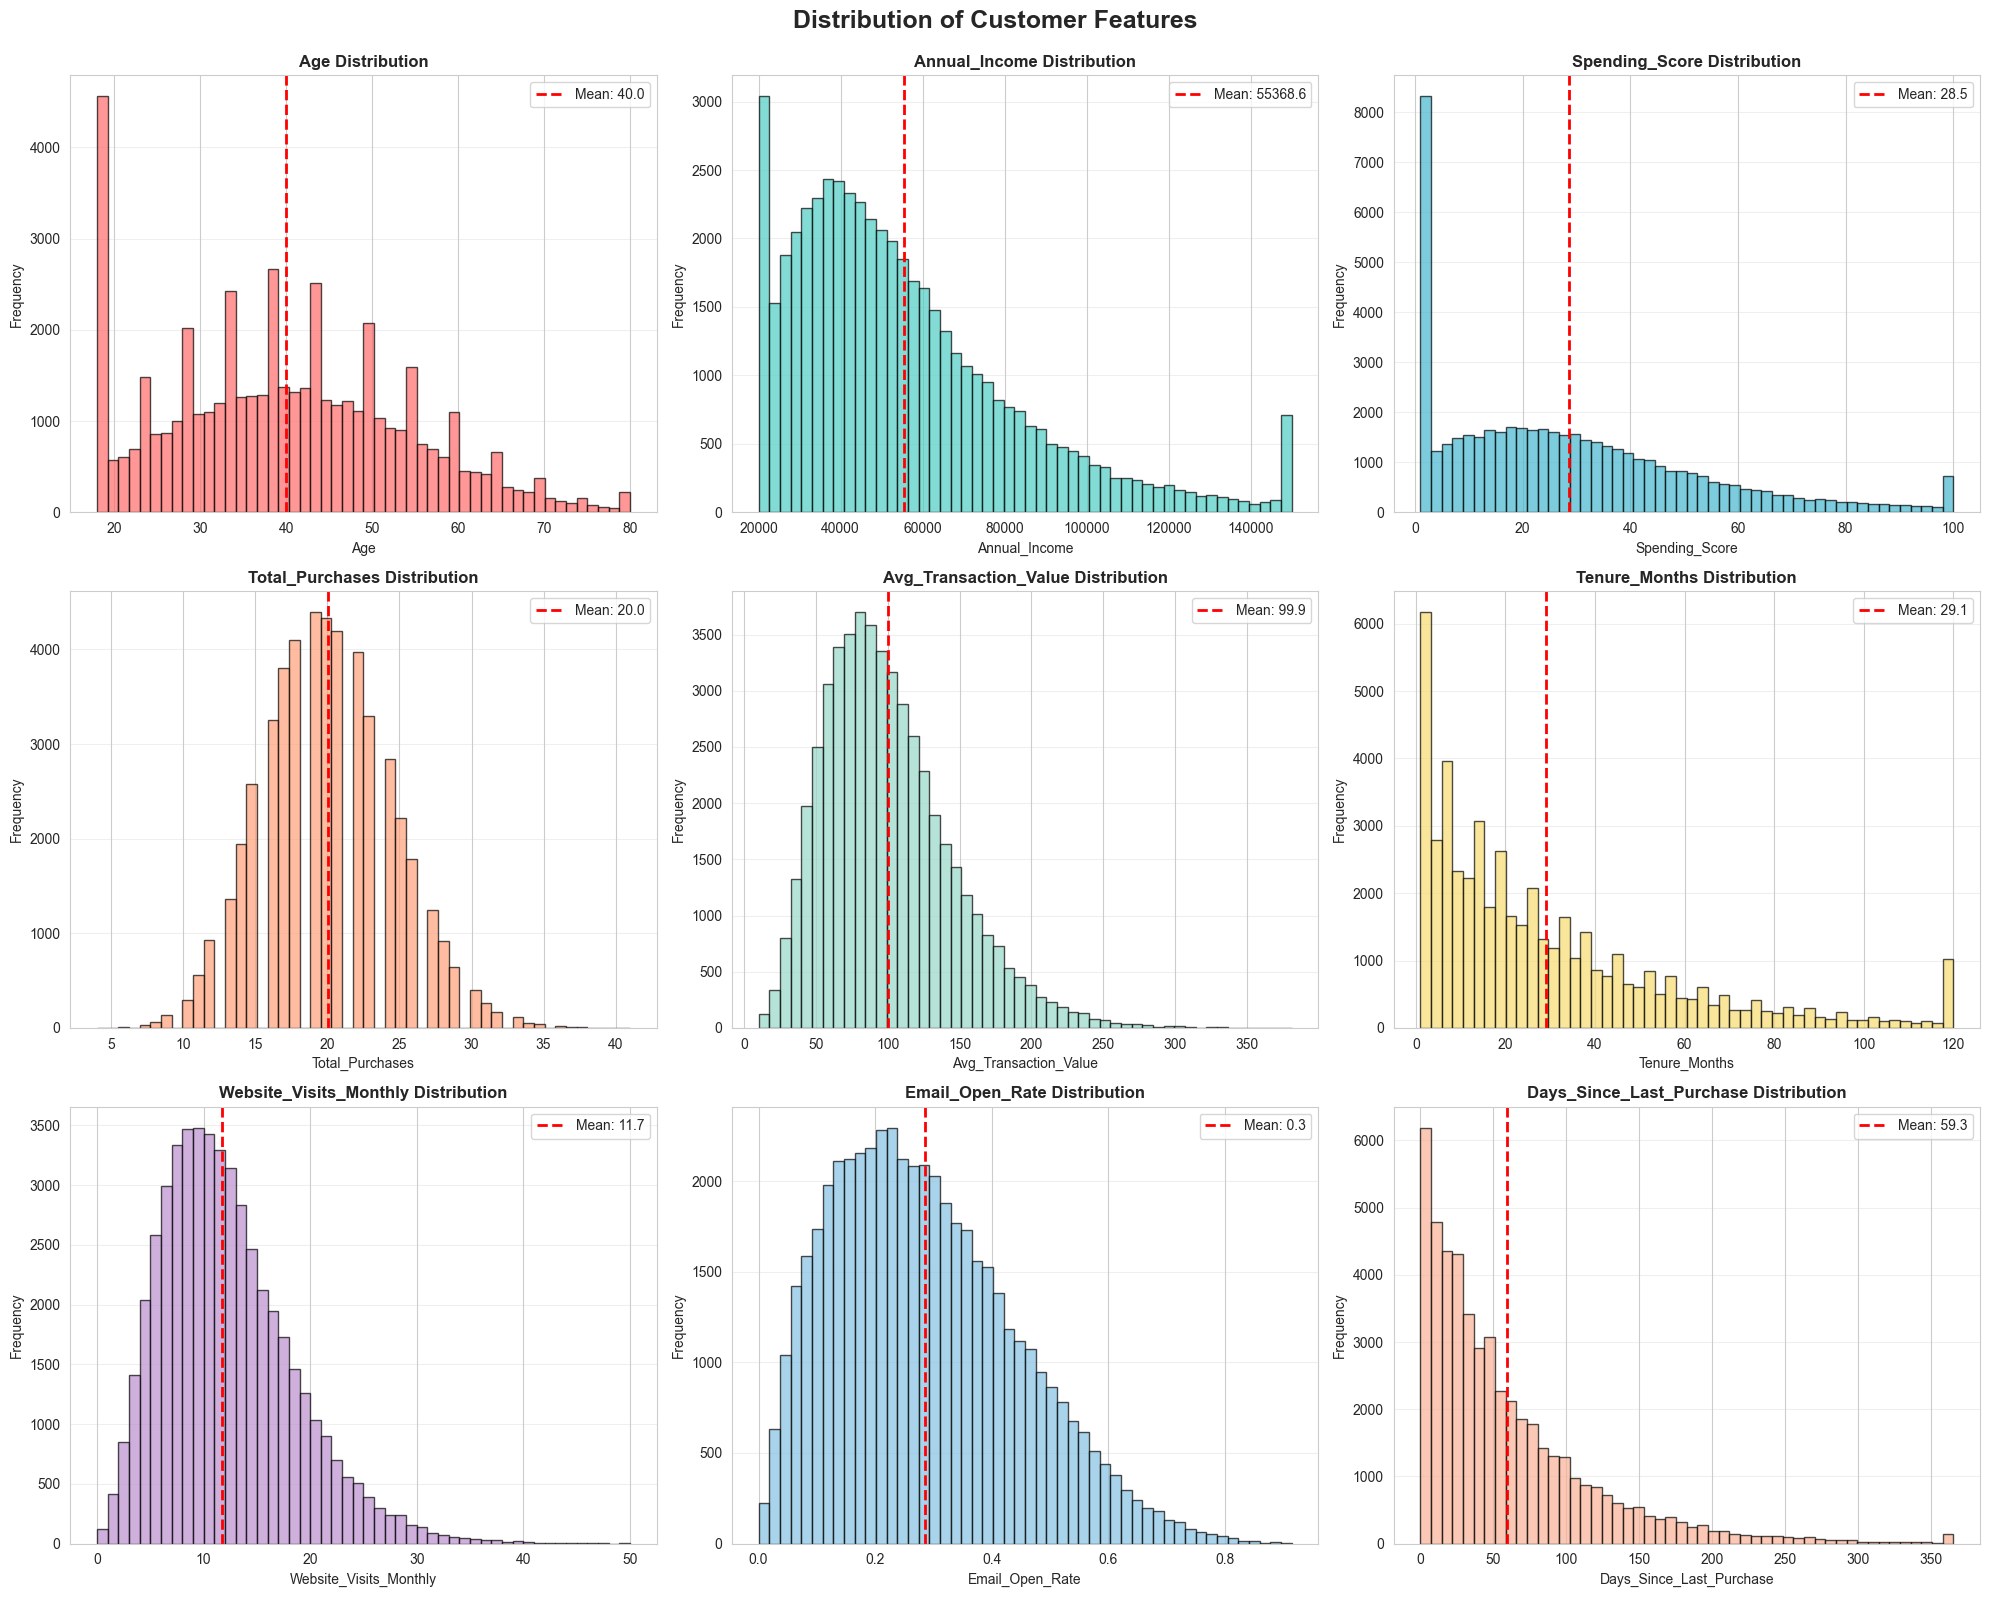


✅ Saved: visualization/distributions.png


In [6]:
# Distribution of all features
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('Distribution of Customer Features', fontsize=18, fontweight='bold', y=0.995)

numerical_cols = ['Age', 'Annual_Income', 'Spending_Score', 
                  'Total_Purchases', 'Avg_Transaction_Value', 
                  'Tenure_Months', 'Website_Visits_Monthly', 
                  'Email_Open_Rate', 'Days_Since_Last_Purchase']

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', 
          '#F7DC6F', '#BB8FCE', '#85C1E2', '#F8B195']

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].hist(df[col], bins=50, color=colors[idx], 
                            edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(f'{col} Distribution', 
                                 fontsize=12, fontweight='bold')
    axes[row, col_idx].set_xlabel(col, fontsize=10)
    axes[row, col_idx].set_ylabel('Frequency', fontsize=10)
    axes[row, col_idx].grid(axis='y', alpha=0.3)
    
    mean_val = df[col].mean()
    axes[row, col_idx].axvline(mean_val, color='red', 
                               linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[row, col_idx].legend()

plt.tight_layout()
plt.savefig('../visualization/distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Saved: visualization/distributions.png")

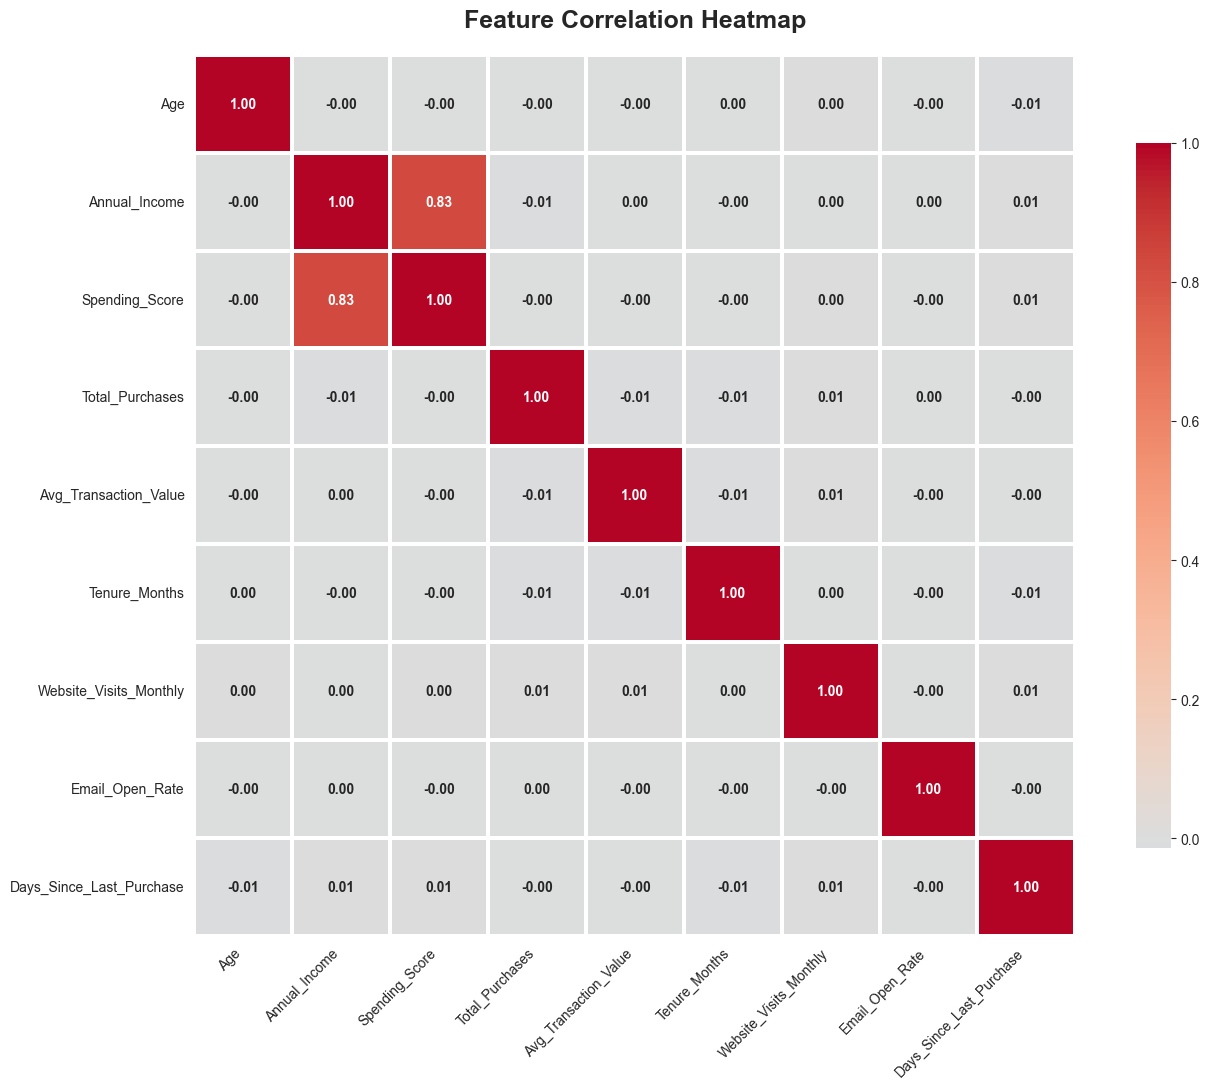


✅ Saved: visualization/correlation_heatmap.png

STRONG CORRELATIONS (|r| > 0.5)
• Annual_Income ↔ Spending_Score: 0.831


In [7]:
# Correlation Analysis
plt.figure(figsize=(14, 11))
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1.5, cbar_kws={"shrink": 0.8},
            annot_kws={'size': 10, 'weight': 'bold'})

plt.title('Feature Correlation Heatmap', fontsize=18, pad=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig('../visualization/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Saved: visualization/correlation_heatmap.png")

# Print strong correlations
print("\n" + "="*70)
print("STRONG CORRELATIONS (|r| > 0.5)")
print("="*70)
strong_corr_found = False
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"• {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.3f}")
            strong_corr_found = True
            
if not strong_corr_found:
    print("No strong correlations found (|r| > 0.5)")

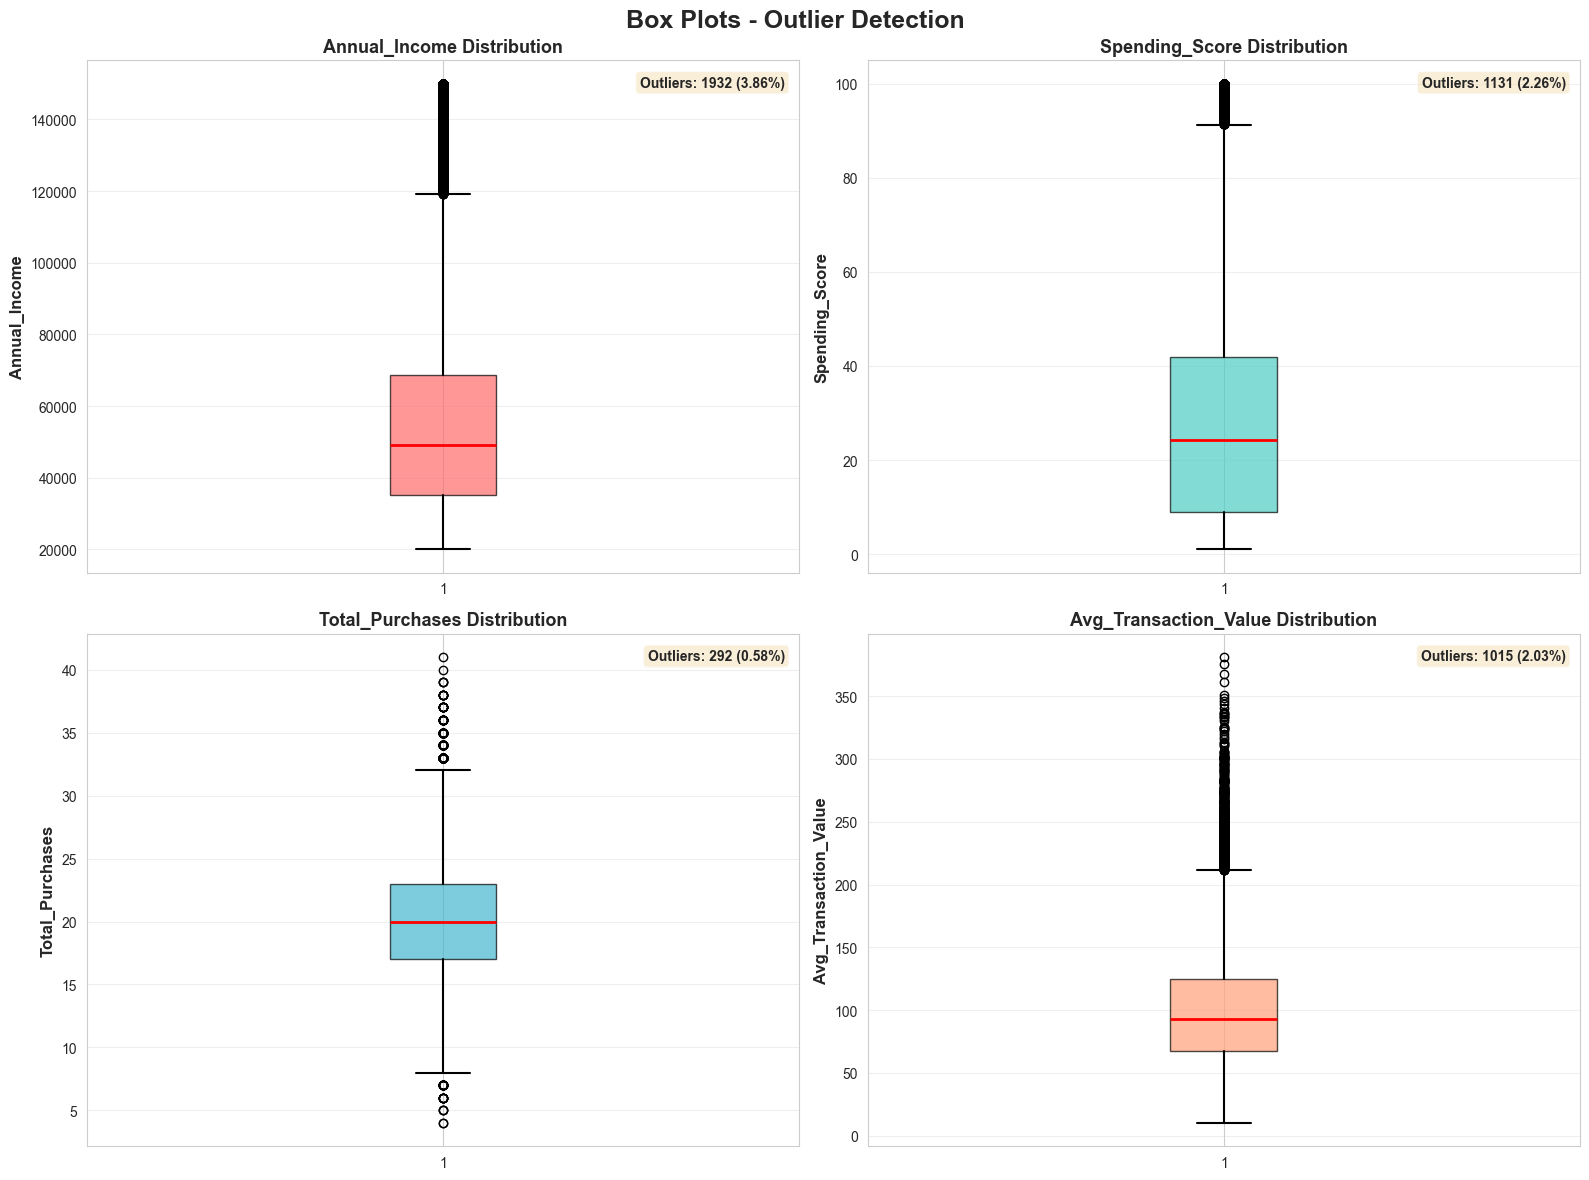


✅ Saved: visualization/boxplots.png


In [8]:
# Box Plots for outlier detection
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Box Plots - Outlier Detection', fontsize=18, fontweight='bold')

key_features = ['Annual_Income', 'Spending_Score', 'Total_Purchases', 'Avg_Transaction_Value']
colors_box = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, feature in enumerate(key_features):
    row = idx // 2
    col = idx % 2
    
    bp = axes[row, col].boxplot(df[feature], vert=True, patch_artist=True,
                                 boxprops=dict(facecolor=colors_box[idx], alpha=0.7),
                                 medianprops=dict(color='red', linewidth=2),
                                 whiskerprops=dict(linewidth=1.5),
                                 capprops=dict(linewidth=1.5))
    
    axes[row, col].set_ylabel(feature, fontsize=12, fontweight='bold')
    axes[row, col].set_title(f'{feature} Distribution', fontsize=13, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3, axis='y')
    
    # Calculate outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)]
    
    axes[row, col].text(0.98, 0.97, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)',
                       transform=axes[row, col].transAxes,
                       verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                       fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualization/boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✅ Saved: visualization/boxplots.png")